# Step 1: Importing Essential Libraries

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Loading Data

In [6]:
#Location of hmnist_28_28_RGB.csv from data set
path="hmnist_28_28_RGB.csv"

In [7]:
df=pd.read_csv(path)

In [8]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train set and Testing set Split

In [9]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [10]:
print(len(train_set))

8012


In [11]:
print(len(test_set))

2003


In [12]:
df.label.unique()

array([2, 4, 6, 1, 3, 0, 5], dtype=int64)

In [13]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [14]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [15]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


# Step 4: Exploring data and analysing 

<AxesSubplot:xlabel='label', ylabel='count'>

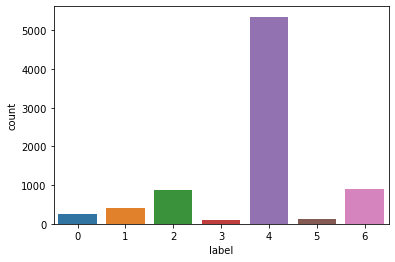

In [16]:
import seaborn as sns

sns.countplot(train_set['label'])

In [17]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='label', ylabel='count'>

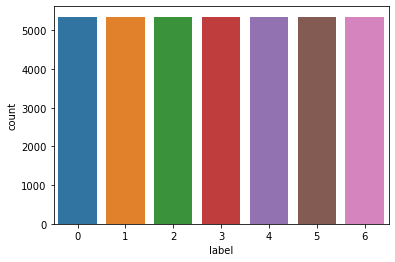

In [18]:
sns.countplot(y_train)

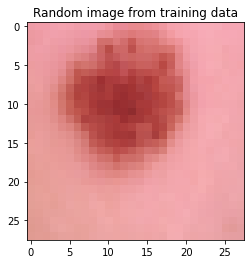

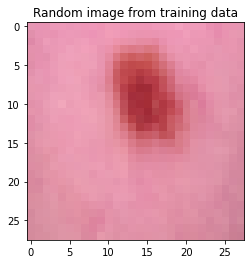

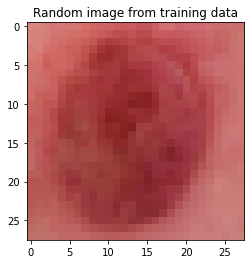

In [22]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: CNN Algorithm(Model Buiding)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [24]:
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://keras.io/api/layers/convolution_layers/convolution2d
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 

# Step 6: Setting Optimizer and Annealing

In [25]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [26]:
%time 

optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

Wall time: 0 ns


# Step 7: Fitting the Model

In [27]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/235 [==============================] - 23s 80ms/step - loss: 1.2229 - accuracy: 0.5675 - val_loss: 2.7710 - val_accuracy: 0.0224
Epoch 2/50
235/235 [==============================] - 18s 75ms/step - loss: 0.4304 - accuracy: 0.8574 - val_loss: 1.9682 - val_accuracy: 0.2680
Epoch 3/50
235/235 [==============================] - 19s 81ms/step - loss: 0.2766 - accuracy: 0.9063 - val_loss: 1.3548 - val_accuracy: 0.3884
Epoch 4/50
235/235 [==============================] - 18s 77ms/step - loss: 0.2152 - accuracy: 0.9266 - val_loss: 1.4789 - val_accuracy: 0.4274
Epoch 5/50
235/235 [==============================] - 17s 74ms/step - loss: 0.1797 - accuracy: 0.9371 - val_loss: 0.6284 - val_accuracy: 0.6877
Epoch 6/50
235/235 [==============================] - 17s 72ms/step - loss: 0.1525 - accuracy: 0.9476 - val_loss: 0.6760 - val_accuracy: 0.7218
Epoch 7/50
235/235 [==============================] - 17s 73ms/step - loss: 0.1222 - accuracy: 0.9558 - val_loss: 0.5171 - val_accuracy:

# Step 8: Model Evaluation

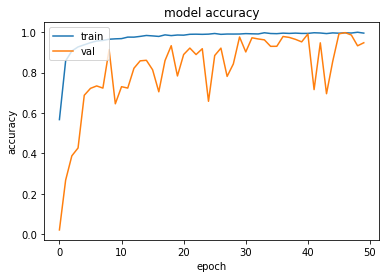

In [38]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

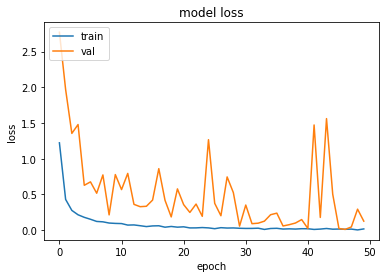

In [39]:
#plot of loss vs epoch

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [40]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.5911 - accuracy: 0.7409 - 777ms/epoch - 12ms/step


In [41]:
#accueacy is measured using confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


In [42]:
print(conf_mat)

[[  24    7   10    1   22    0    1]
 [  11   43    6    4   32    2    4]
 [   6    7   85    3   97    1   19]
 [   1    2    3    9    8    0    0]
 [   9    9   51    5 1246    1   31]
 [   0    3    0    0    3   21    2]
 [   9    7   28    0  113    1   56]]


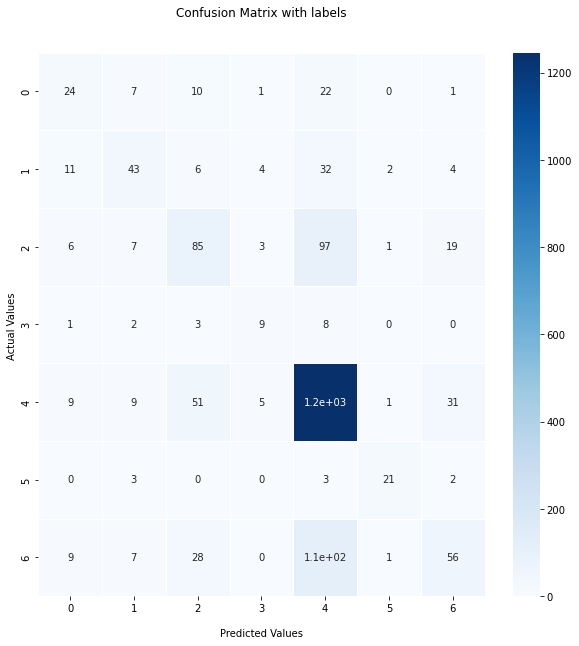

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

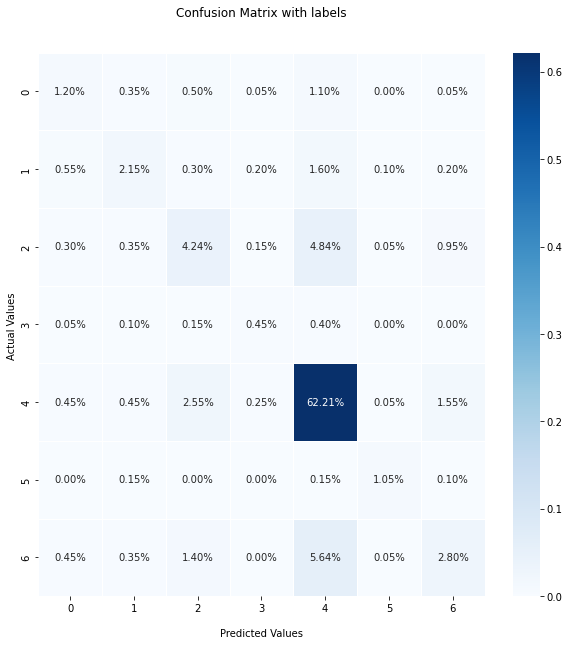

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [45]:
import PIL
# take any images from HAM10000_images_part_1 or HAM10000_images_part_2 file for sample image that  is location (ex:ISIC_0024306.jpg)
image=PIL.Image.open('sampleimage.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])

[3.3659287e-06 1.5911672e-06 9.9991417e-01 5.7748082e-07 4.0680636e-05
 1.1602834e-06 3.8449740e-05]
('bkl', 'benign keratosis-like lesions')
